In [1]:
import os

os.environ["LL_DISABLE_TYPECHECKING"] = "1"
os.environ["CUDA_VISIBLE_DEVICES"] = "3"


import ll
import rich
import torch

ll.pretty()

torch.no_grad().__enter__()
torch.inference_mode().__enter__()

TensorBoard/TensorBoardX not found. Disabling TensorBoardLogger. Please install TensorBoard with `pip install tensorboard` or TensorBoardX with `pip install tensorboardx` to enable TensorBoard logging.


In [2]:
from jmppeft.tasks.finetune.base import FinetuneMatBenchDiscoveryIS2REDatasetConfig

dataset_config = FinetuneMatBenchDiscoveryIS2REDatasetConfig(
    # sample_n=DatasetSampleNConfig(sample_n=16, seed=42)
)
print(dataset_config)

dataset_og = dataset_config.create_dataset()
dataset_og, len(dataset_og)

[22:50:50] CRITICAL Type checking is disabled due to the environment variable                       ]8;id=438740;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/ll/src/ll/typecheck.py\typecheck.py]8;;\:]8;id=801053;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/ll/src/ll/typecheck.py#55\55]8;;\
                    LL_DISABLE_TYPECHECKING.                                                                       

           INFO     PyTorch version 2.2.2 available.                                                   ]8;id=91356;file:///net/csefiles/coc-fung-cluster/nima/miniforge3/envs/jmp-peft/lib/python3.11/site-packages/datasets/config.py\config.py]8;;\:]8;id=101485;file:///net/csefiles/coc-fung-cluster/nima/miniforge3/envs/jmp-peft/lib/python3.11/site-packages/datasets/config.py#58\58]8;;\


Loading 'wbm_summary' from cached file at '/nethome/nsg6/.cache/matbench-discovery/1.0.0/wbm/2023-12-13-wbm-summary.csv.gz'


(<jmppeft.datasets.mpd_is2re.MatBenchDiscoveryIS2REDataset at 0x7fb1ee865850>,
 256963)

In [7]:
from pathlib import Path

run_id = "9ruj4euu"
ckpt_path = Path(
    f"/net/csefiles/coc-fung-cluster/nima/shared/experiment-data/lltrainer/{run_id}/checkpoint/last.ckpt"
)
# If the file is a symlink, get the target
if ckpt_path.is_symlink():
    print(f"Symlink found {ckpt_path} => {ckpt_path.resolve()}")
    ckpt_path = ckpt_path.resolve()

ckpt_path

Symlink found /net/csefiles/coc-fung-cluster/nima/shared/experiment-data/lltrainer/9ruj4euu/checkpoint/last.ckpt => /net/csefiles/coc-fung-cluster/nima/shared/experiment-data/lltrainer/9ruj4euu/checkpoint/epoch=8-step=130392-val_matbench_discovery_force_mae=0.042557213455438614.ckpt


Path('/net/csefiles/coc-fung-cluster/nima/shared/experiment-data/lltrainer/9ruj4euu/checkpoint/epoch=8-step=130392-val_matbench_discovery_force_mae=0.042557213455438614.ckpt')

In [8]:
from jmppeft.tasks.finetune import matbench_discovery as M

default_dtype = torch.float32
model = M.MatbenchDiscoveryModel.load_from_checkpoint(ckpt_path, map_location="cuda")
model = model.to(default_dtype)
model

[22:51:26] CRITICAL Using regular backbone                                                              ]8;id=670218;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/tasks/finetune/base.py\base.py]8;;\:]8;id=494270;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/tasks/finetune/base.py#605\605]8;;\

Unrecognized arguments:  dict_keys(['name', 'learnable_rbf', 'learnable_rbf_stds', 'unique_basis_per_layer', 'dropout', 'edge_dropout', 'ln_per_layer', 'scale_factor_to_ln'])


           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=22672;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=177309;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=224629;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=687304;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=253320;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=615445;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=478970;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=959020;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=186321;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=872776;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=648998;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=245890;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

           INFO     [RadialBasis] Using absolute cutoff of 12.0 Angstroms.       ]8;id=513903;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py\radial_basis_dynamic_cutoff.py]8;;\:]8;id=855262;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/models/gemnet/layers/radial_basis_dynamic_cutoff.py#213\213]8;;\

[22:51:29] CRITICAL Constructed backbone with dlora=None                                                ]8;id=310723;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/tasks/finetune/base.py\base.py]8;;\:]8;id=270463;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/tasks/finetune/base.py#616\616]8;;\

           INFO     Registered 12 shared parameters                                         ]8;id=857995;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/ll/src/ll/model/modules/shared_parameters.py\shared_parameters.py]8;;\:]8;id=876999;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/ll/src/ll/model/modules/shared_parameters.py#72\72]8;;\

           INFO     List of ignored parameters: []                                                      ]8;id=325802;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/tasks/finetune/base.py\base.py]8;;\:]8;id=73168;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/tasks/finetune/base.py#694\694]8;;\

           CRITICAL Freezing 0 parameters (0.00%) out of 40,983,796 total parameters (40,983,796        ]8;id=947600;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/tasks/finetune/base.py\base.py]8;;\:]8;id=961833;file:///net/csefiles/coc-fung-cluster/nima/shared/repositories/jmp-peft/src/jmppeft/tasks/finetune/base.py#923\923]8;;\
                    trainable)                                                                                     

MatbenchDiscoveryModel(config=MatbenchDiscoveryConfig(name=mptrj-jmps-direct-bsz100, project=jmp_mptrj), device=cuda:0)

In [9]:
from collections import Counter

import jmppeft.modules.dataset.dataset_transform as DT
import torch.utils._pytree as tree
from lightning.fabric.utilities.apply_func import move_data_to_device
from torch_geometric.data import Batch, Data


def data_transform(data: Data):
    data = model.data_transform(data)
    data = Data.from_dict(
        tree.tree_map(
            lambda x: x.type(default_dtype)
            if torch.is_tensor(x) and torch.is_floating_point(x)
            else x,
            data.to_dict(),
        )
    )
    return data


def composition(data: Batch):
    return dict(Counter(data.atomic_numbers.tolist()))


num_items = 1024

dataset = DT.transform(dataset_og, data_transform)
dataset = DT.sample_n_transform(dataset, n=num_items, seed=42)


idx = 32
data = Batch.from_data_list([dataset[idx]])
rich.print(
    data.to_dict(),
    composition(data),
)

{
    'pos': tensor[11, 3] n=33 x∈[-4.287, 6.937] μ=1.412 σ=2.423,
    'id': ['wbm-3-72883'],
    'atomic_numbers': tensor[11] i64 x∈[50, 79] μ=62.000 σ=14.269,
    'cell': tensor[1, 3, 3] n=9 x∈[-3.509, 6.938] μ=1.065 σ=4.112 [[[6.029, 0., -3.509], [-2.037, 5.674, -3.509], 
[0., 0., 6.938]]],
    'y_formation': tensor[1] [-0.236],
    'y_formation_correction': tensor[1] [0.],
    'y_above_hull': tensor[1] [0.093],
    'natoms': tensor[1] i64 [11],
    'tags': tensor[11] i64 x∈[2, 2] μ=2.000 σ=0.,
    'fixed': tensor[11] bool all_zeros,
    'batch': tensor[11] i64 all_zeros,
    'ptr': tensor[2] i64 μ=5.500 σ=7.778 [0, 11]
}
{66: 1, 50: 6, 79: 4}

In [19]:
from jmppeft.modules.relaxer import ModelOutput, Relaxer
from matbench_discovery.energy import get_e_form_per_atom

USE_Y_RELAXED = True


def model_fn(data, initial_data, *, use_y_relaxed: bool = USE_Y_RELAXED) -> ModelOutput:
    model_out = model.forward_denormalized(data)

    energy = model_out["y_relaxed"] if use_y_relaxed else model_out["y"]
    forces = model_out["force"]
    stress = model_out["stress"]

    # JMP-S v2 energy is corrected_energy, i.e., DFT total energy
    # This energy is now DFT total energy, we need to convert it to formation energy per atom
    energy = get_e_form_per_atom(
        {
            "composition": composition(data),
            "energy": energy,
        }
    )
    assert isinstance(energy, torch.Tensor)

    # Add the correction factor
    if False:
        energy += initial_data.y_formation_correction.item()

    energy = energy.view(1)
    forces = forces.view(-1, 3)
    stress = stress.view(1, 3, 3) if stress.numel() == 9 else stress.view(1, 6)

    return {
        "energy": energy,
        "forces": forces,
        "stress": stress,
    }


data = move_data_to_device(data, model.device)
model_fn(data, data)

{'energy': tensor[1] cuda:0 [-2.078],
 'forces': tensor[10, 3] n=30 x∈[-2.355, 2.333] μ=-0.000 σ=1.323 cuda:0,
 'stress': tensor[1, 3, 3] n=9 x∈[-0.004, 0.108] μ=0.033 σ=0.053 cuda:0 [[[0.102, 0.001, -0.004], [0.001, 0.103, -0.003], [-0.004, -0.003, 0.108]]]}

In [16]:
from jmppeft.modules.relaxer import RelaxerConfig

config = RelaxerConfig(
    compute_stress=True,
    stress_weight=0.1,
    optimizer="FIRE",
    fmax=0.05,
    ase_filter="frechet",
)
relaxer = Relaxer(
    config=config,
    model=model_fn,
    collate_fn=model.collate_fn,
    device=model.device,
)
rich.print(data.y_formation)
relax_out = relaxer.relax(data)
# rich.print(relax_out)

energy = relax_out.atoms.get_total_energy()
rich.print(energy, data.y_formation)

tensor[1] cuda:0 [-0.227]

      Step     Time          Energy          fmax
FIRE:    0 22:55:36       -0.245373        2.186799
FIRE:    1 22:55:36       -0.231716        2.110040
FIRE:    2 22:55:36       -0.230547        1.971490
FIRE:    3 22:55:37       -0.205702        1.729424
FIRE:    4 22:55:37       -0.199926        1.422933
FIRE:    5 22:55:37       -0.192820        1.053076
FIRE:    6 22:55:37       -0.188602        0.649094
FIRE:    7 22:55:37       -0.196109        0.599414
FIRE:    8 22:55:37       -0.219957        0.740250
FIRE:    9 22:55:37       -0.234837        0.840278
FIRE:   10 22:55:37       -0.246206        0.895621
FIRE:   11 22:55:37       -0.251712        0.865039
FIRE:   12 22:55:37       -0.205953        0.803450
FIRE:   13 22:55:37       -0.165466        0.551977
FIRE:   14 22:55:37       -0.121800        0.106800
FIRE:   15 22:55:37       -0.105055        0.830704
FIRE:   16 22:55:37       -0.103004        0.717277
FIRE:   17 22:55:37       -0.111291        0.547356
FIRE:   18 22:

-0.20218372344970703 tensor[1] cuda:0 [-0.227]

In [17]:
from collections import defaultdict

import numpy as np
from torch.utils.data import DataLoader
from tqdm.auto import tqdm

config = RelaxerConfig(
    compute_stress=True,
    stress_weight=0.1,
    optimizer="FIRE",
    # fmax=0.01,
    # ase_filter="frechet",
    fmax=0.025,
    ase_filter="frechet",
)
relaxer = Relaxer(
    config=config,
    model=model_fn,
    collate_fn=model.collate_fn,
    device=model.device,
)

dl = DataLoader(
    dataset,
    batch_size=1,
    collate_fn=model.collate_fn,
    shuffle=False,
    num_workers=0,
    pin_memory=True,
)

preds_targets = defaultdict[str, list[tuple[float, float]]](lambda: [])

for data in tqdm(dl, total=len(dl)):
    data = move_data_to_device(data, model.device)
    relax_out = relaxer.relax(data, verbose=False)

    e_form_true = data.y_formation.item()
    e_form_pred = relax_out.atoms.get_total_energy()
    preds_targets["e_form"].append((e_form_pred, e_form_true))

    e_above_hull_true = data.y_above_hull.item()
    e_above_hull_pred = e_above_hull_true + (e_form_pred - e_form_true)
    preds_targets["e_above_hull"].append((e_above_hull_pred, e_above_hull_true))

    nsteps = len(relax_out.trajectory.frames)

    print(
        f"# Steps: {nsteps}; e_form: P={e_form_pred:.4f}, GT={e_form_true:.4f}, Δ={abs(e_form_pred - e_form_true):.4f}"
    )

  0%|          | 0/1024 [00:00<?, ?it/s]

# Steps: 35; e_form: P=-0.8178, GT=-0.8008, Δ=0.0169
# Steps: 32; e_form: P=-0.0348, GT=-0.0220, Δ=0.0128
# Steps: 39; e_form: P=-0.6432, GT=-0.6088, Δ=0.0345
# Steps: 85; e_form: P=-0.2697, GT=-0.1544, Δ=0.1153
# Steps: 67; e_form: P=-0.2598, GT=-0.1154, Δ=0.1444
# Steps: 37; e_form: P=-0.3529, GT=-0.3905, Δ=0.0376
# Steps: 26; e_form: P=-0.2697, GT=-0.2468, Δ=0.0230
# Steps: 35; e_form: P=-0.5473, GT=-0.4542, Δ=0.0931
# Steps: 19; e_form: P=-1.9877, GT=-1.9089, Δ=0.0788
# Steps: 13; e_form: P=-0.1732, GT=-0.1224, Δ=0.0508
# Steps: 6; e_form: P=-1.8757, GT=-1.8781, Δ=0.0024
# Steps: 31; e_form: P=-1.5657, GT=-1.6101, Δ=0.0443
# Steps: 34; e_form: P=-1.8023, GT=-1.8180, Δ=0.0157
# Steps: 2; e_form: P=-0.3192, GT=-0.3333, Δ=0.0141
# Steps: 17; e_form: P=-0.7239, GT=-0.7299, Δ=0.0060
# Steps: 14; e_form: P=-0.0493, GT=-0.0433, Δ=0.0060
# Steps: 27; e_form: P=-0.5277, GT=-0.5591, Δ=0.0315
# Steps: 55; e_form: P=-3.1365, GT=-3.0844, Δ=0.0521
# Steps: 13; e_form: P=-1.5811, GT=-1.7130, Δ=0.

{'e_form': {'pred': (1024,), 'true': (1024,)}, 'e_above_hull': {'pred': (1024,), 'true': (1024,)}}

/tmp/ipykernel_3361876/3062433637.py:38: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


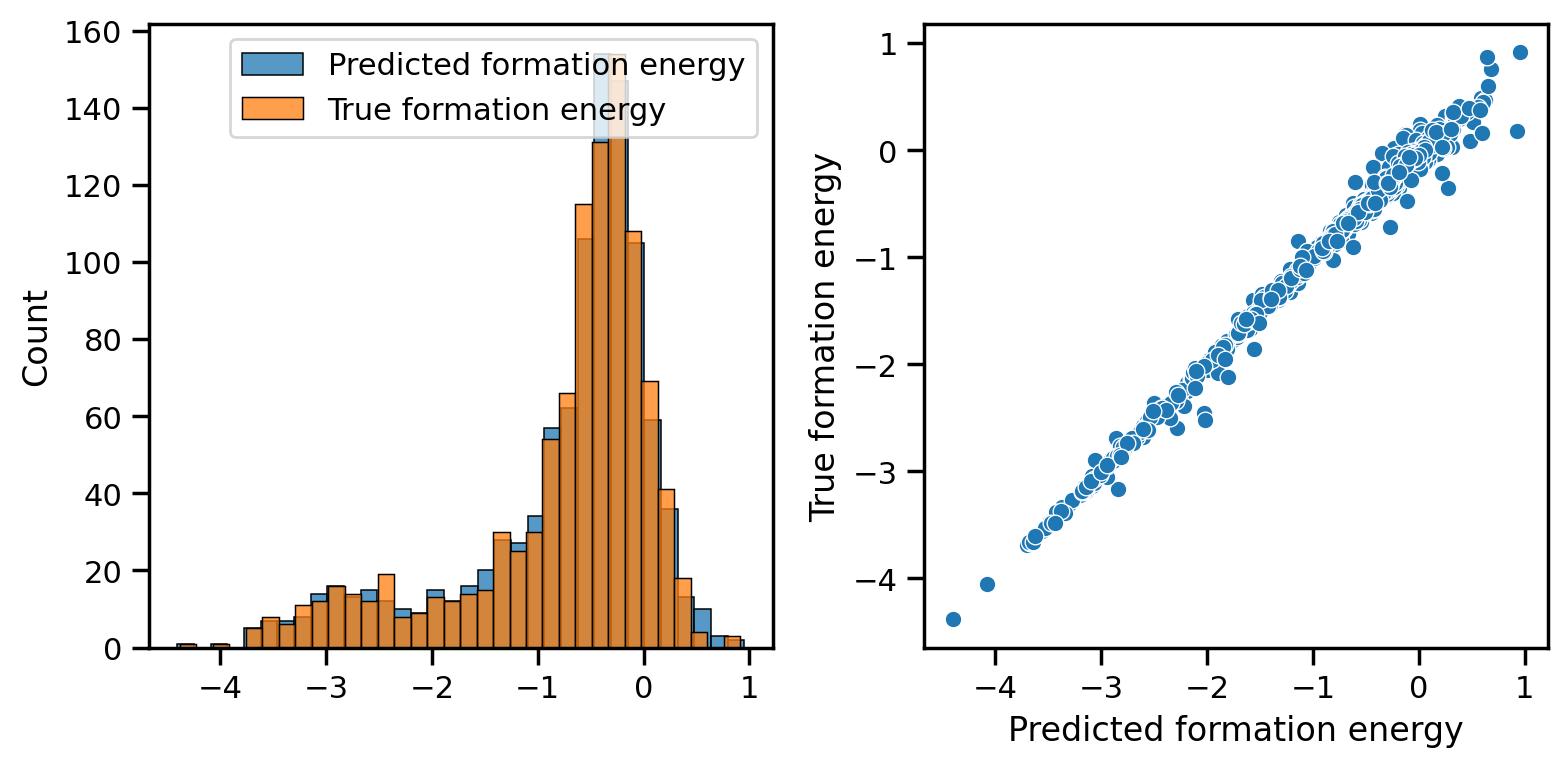

{
    'F1': 0.7418397626112759,
    'DAF': 4.50862979922508,
    'Precision': 0.7352941176470589,
    'Recall': 0.7485029940119761,
    'Accuracy': 0.9150390625,
    'TPR': 0.7485029940119761,
    'FPR': 0.052508751458576426,
    'TNR': 0.9474912485414235,
    'FNR': 0.25149700598802394,
    'TP': 125,
    'FP': 45,
    'TN': 812,
    'FN': 42,
    'MAE': 0.04489339136972603,
    'RMSE': 0.08021881308417708,
    'R2': 0.9084696598169536
}

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from matbench_discovery.metrics import stable_metrics

sns.set_context("notebook")

e_form_true, e_form_pred = zip(*preds_targets["e_form"])
e_form_true = np.array(e_form_true)
e_form_pred = np.array(e_form_pred)

e_above_hull_true, e_above_hull_pred = zip(*preds_targets["e_above_hull"])
e_above_hull_true = np.array(e_above_hull_true)
e_above_hull_pred = np.array(e_above_hull_pred)

rich.print(
    {
        "e_form": {"pred": e_form_pred.shape, "true": e_form_true.shape},
        "e_above_hull": {
            "pred": e_above_hull_pred.shape,
            "true": e_above_hull_true.shape,
        },
    }
)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes = axes.flatten()

ax = axes[0]
sns.histplot(e_form_pred, label="Predicted formation energy", ax=ax)
sns.histplot(e_form_true, label="True formation energy", ax=ax)
ax.legend()

ax = axes[1]
sns.scatterplot(y=e_form_true, x=e_form_pred, ax=ax)
ax.set_xlabel("Predicted formation energy")
ax.set_ylabel("True formation energy")

fig.tight_layout()
plt.show()

metrics = stable_metrics(e_above_hull_true, e_above_hull_pred, fillna=False)
rich.print(metrics)

In [20]:
from collections import defaultdict
from functools import partial

import numpy as np
from torch.utils.data import DataLoader
from tqdm.auto import tqdm

config = RelaxerConfig(
    compute_stress=True,
    stress_weight=0.1,
    optimizer="FIRE",
    # fmax=0.01,
    # ase_filter="frechet",
    fmax=0.025,
    ase_filter="frechet",
)
relaxer = Relaxer(
    config=config,
    model=partial(model_fn, use_y_relaxed=False),
    collate_fn=model.collate_fn,
    device=model.device,
)

dl = DataLoader(
    dataset,
    batch_size=1,
    collate_fn=model.collate_fn,
    shuffle=False,
    num_workers=0,
    pin_memory=True,
)

preds_targets = defaultdict[str, list[tuple[float, float]]](lambda: [])

for data in tqdm(dl, total=len(dl)):
    data = move_data_to_device(data, model.device)
    relax_out = relaxer.relax(data, verbose=False)

    e_form_true = data.y_formation.item()
    e_form_pred = relax_out.atoms.get_total_energy()
    preds_targets["e_form"].append((e_form_pred, e_form_true))

    e_above_hull_true = data.y_above_hull.item()
    e_above_hull_pred = e_above_hull_true + (e_form_pred - e_form_true)
    preds_targets["e_above_hull"].append((e_above_hull_pred, e_above_hull_true))

    nsteps = len(relax_out.trajectory.frames)

    print(
        f"# Steps: {nsteps}; e_form: P={e_form_pred:.4f}, GT={e_form_true:.4f}, Δ={abs(e_form_pred - e_form_true):.4f}"
    )

  0%|          | 0/1024 [00:00<?, ?it/s]

# Steps: 35; e_form: P=-0.8168, GT=-0.8008, Δ=0.0160
# Steps: 32; e_form: P=-0.0619, GT=-0.0220, Δ=0.0399
# Steps: 39; e_form: P=-0.6382, GT=-0.6088, Δ=0.0294
# Steps: 51; e_form: P=-0.2940, GT=-0.1544, Δ=0.1395
# Steps: 80; e_form: P=-0.2619, GT=-0.1154, Δ=0.1465
# Steps: 37; e_form: P=-0.3505, GT=-0.3905, Δ=0.0400
# Steps: 26; e_form: P=-0.2611, GT=-0.2468, Δ=0.0143
# Steps: 33; e_form: P=-0.5307, GT=-0.4542, Δ=0.0765
# Steps: 19; e_form: P=-1.9950, GT=-1.9089, Δ=0.0860
# Steps: 13; e_form: P=-0.1716, GT=-0.1224, Δ=0.0493
# Steps: 6; e_form: P=-1.8696, GT=-1.8781, Δ=0.0086
# Steps: 31; e_form: P=-1.5770, GT=-1.6101, Δ=0.0331
# Steps: 34; e_form: P=-1.7988, GT=-1.8180, Δ=0.0192
# Steps: 2; e_form: P=-0.3143, GT=-0.3333, Δ=0.0189
# Steps: 17; e_form: P=-0.7131, GT=-0.7299, Δ=0.0168
# Steps: 14; e_form: P=0.2267, GT=-0.0433, Δ=0.2700
# Steps: 27; e_form: P=-0.5314, GT=-0.5591, Δ=0.0277
# Steps: 53; e_form: P=-3.1301, GT=-3.0844, Δ=0.0456
# Steps: 13; e_form: P=-1.5810, GT=-1.7130, Δ=0.1

{'e_form': {'pred': (1024,), 'true': (1024,)}, 'e_above_hull': {'pred': (1024,), 'true': (1024,)}}

/tmp/ipykernel_3361876/3062433637.py:38: UserWarning: The figure layout has changed to tight
  fig.tight_layout()


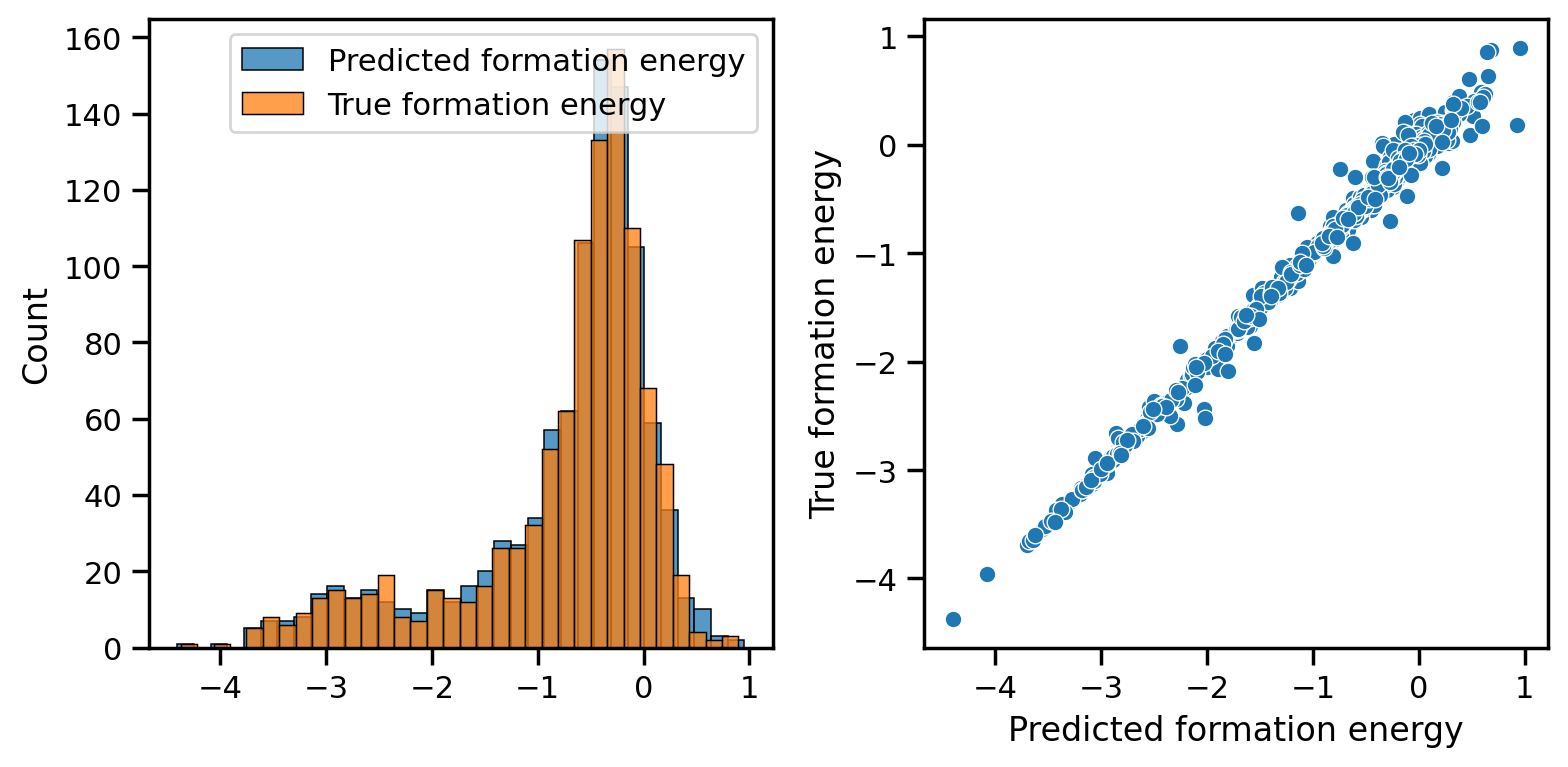

{
    'F1': 0.7080745341614908,
    'DAF': 4.517647058823529,
    'Precision': 0.6705882352941176,
    'Recall': 0.75,
    'Accuracy': 0.908203125,
    'TPR': 0.75,
    'FPR': 0.06422018348623854,
    'TNR': 0.9357798165137615,
    'FNR': 0.25,
    'TP': 114,
    'FP': 56,
    'TN': 816,
    'FN': 38,
    'MAE': 0.04739447414078768,
    'RMSE': 0.08317770728162838,
    'R2': 0.905135205131942
}

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
from matbench_discovery.metrics import stable_metrics

sns.set_context("notebook")

e_form_true, e_form_pred = zip(*preds_targets["e_form"])
e_form_true = np.array(e_form_true)
e_form_pred = np.array(e_form_pred)

e_above_hull_true, e_above_hull_pred = zip(*preds_targets["e_above_hull"])
e_above_hull_true = np.array(e_above_hull_true)
e_above_hull_pred = np.array(e_above_hull_pred)

rich.print(
    {
        "e_form": {"pred": e_form_pred.shape, "true": e_form_true.shape},
        "e_above_hull": {
            "pred": e_above_hull_pred.shape,
            "true": e_above_hull_true.shape,
        },
    }
)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes = axes.flatten()

ax = axes[0]
sns.histplot(e_form_pred, label="Predicted formation energy", ax=ax)
sns.histplot(e_form_true, label="True formation energy", ax=ax)
ax.legend()

ax = axes[1]
sns.scatterplot(y=e_form_true, x=e_form_pred, ax=ax)
ax.set_xlabel("Predicted formation energy")
ax.set_ylabel("True formation energy")

fig.tight_layout()
plt.show()

metrics = stable_metrics(e_above_hull_true, e_above_hull_pred, fillna=False)
rich.print(metrics)